<a href="https://colab.research.google.com/github/Soumdeb/IDEAS_TIHub_Final_Project_Submission/blob/main/02_exploratory_data_analysis_with_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

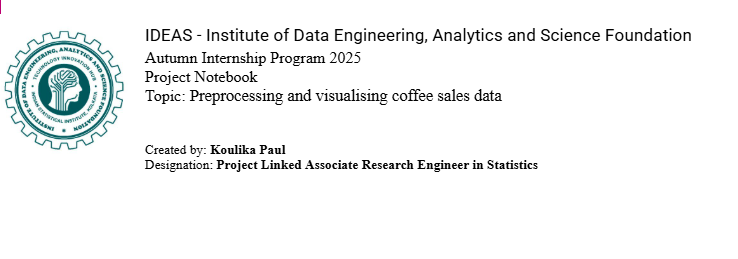

In [1893]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [1894]:
from google.colab import drive
drive.mount('/content/drive')
coffee_data=pd.read_csv("/content/drive/MyDrive/Coffe_sales.csv")
coffee_data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.70,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.90,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.70,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000
...,...,...,...,...,...,...,...,...,...,...,...
3542,10,card,35.76,Cappuccino,Morning,Sun,Mar,7,3,2025-03-23,10:34:54.894000
3543,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:43:37.362000
3544,14,card,35.76,Cocoa,Afternoon,Sun,Mar,7,3,2025-03-23,14:44:16.864000
3545,15,card,25.96,Americano,Afternoon,Sun,Mar,7,3,2025-03-23,15:47:28.723000


**Q1. Find the number of columns, duplicate columns, and missing values**

In [1895]:
num_columns = coffee_data.shape[1]
duplicate_columns = coffee_data.T.duplicated().sum()
missing_values = coffee_data.isnull().sum()

print("Number of columns:", num_columns)
print("Number of duplicate columns:", duplicate_columns)
print("\nMissing values per column:\n", missing_values)

Number of columns: 11
Number of duplicate columns: 0

Missing values per column:
 hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


***Basic statistics of the data***

In [1896]:
coffee_data.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [1897]:
coffee_data.dtypes

,0
hour_of_day,int64
cash_type,object
money,float64
coffee_name,object
Time_of_Day,object
Weekday,object
Month_name,object
Weekdaysort,int64
Monthsort,int64
Date,object


In [1898]:
coffee_data['Date']= pd.to_datetime(coffee_data['Date']) ## converting the object datatype to datetime
coffee_data['Month']=coffee_data['Date'].dt.month
coffee_data['Year']=(coffee_data['Date'].dt.year).astype('int')

***Average money for each year***

In [1899]:
grouped_data = coffee_data.groupby('Year')['money'].agg("mean")
grouped_data

,money
Year,
2024,31.737634
2025,31.390011


***The density of money over years***

<Axes: xlabel='Year', ylabel='money'>

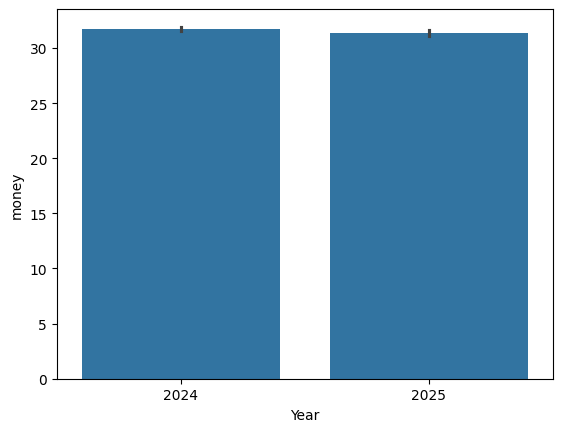

In [1900]:
sns.barplot(data= coffee_data,x='Year',y= coffee_data['money'])

**Q2. Find the datatype of grouped_data**

In [1901]:
print("\nType of grouped_data:", type(grouped_data))
print("Dtype of grouped_data values:", grouped_data.dtypes)


Type of grouped_data: <class 'pandas.core.series.Series'>
Dtype of grouped_data values: float64


**Q3. Find the maximum money for each month**

In [1902]:
max_money_per_month_df = coffee_data.groupby('Month', as_index=False)['money'].max()
max_money_per_month_df.rename(columns={'money': 'Max_Money'}, inplace=True)

print("\nMaximum Money per Month:\n", max_money_per_month_df)


Maximum Money per Month:
     Month  Max_Money
0       1      35.76
1       2      35.76
2       3      38.70
3       4      38.70
4       5      37.72
5       6      37.72
6       7      37.72
7       8      32.82
8       9      35.76
9      10      35.76
10     11      35.76
11     12      35.76


***Distribution of money over months***

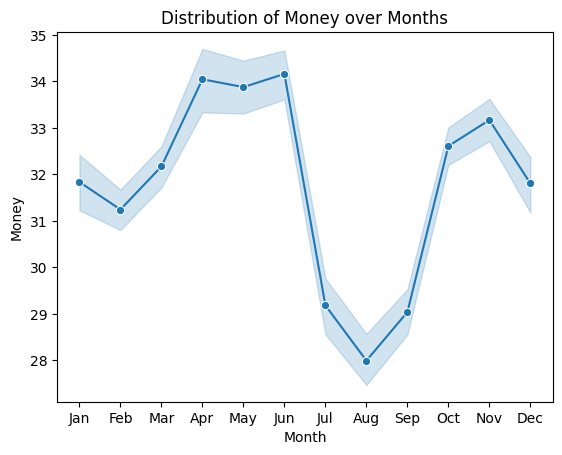

In [1903]:
sns.lineplot(x="Monthsort", y="money", data=coffee_data, marker="o")
plt.xticks(coffee_data["Monthsort"].unique(), coffee_data["Month_name"].unique())
plt.xlabel("Month")
plt.ylabel("Money")
plt.title("Distribution of Money over Months")
plt.show()


**Q4. Find the distribution of money over coffee names**


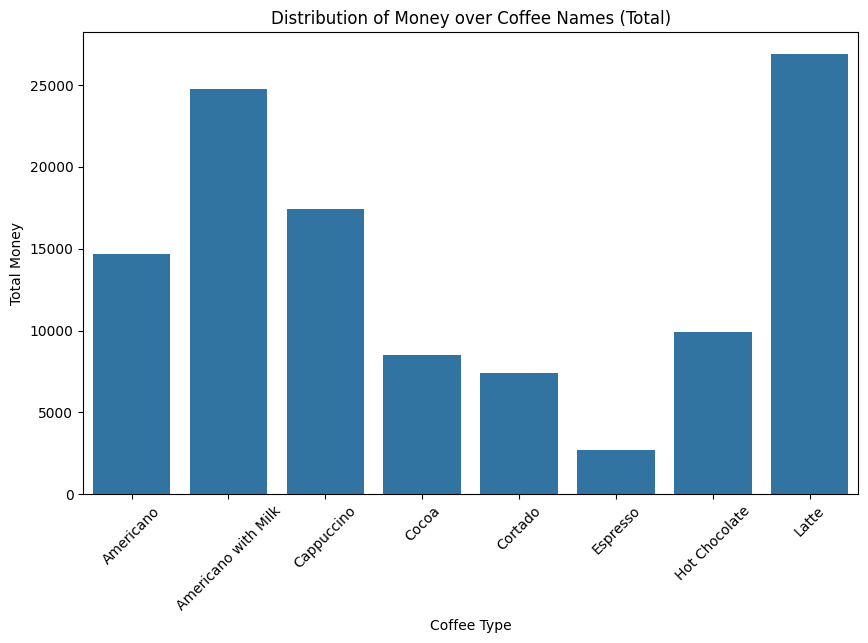


Total Money per Coffee Type:
            coffee_name     money
0            Americano  14650.26
1  Americano with Milk  24751.12
2           Cappuccino  17439.14
3                Cocoa   8521.16
4              Cortado   7384.86
5             Espresso   2690.28
6        Hot Chocolate   9933.46
7                Latte  26875.30


In [1904]:
money_by_coffee = coffee_data.groupby('coffee_name', as_index=False)['money'].sum()
plt.figure(figsize=(10,6))
sns.barplot(x="coffee_name", y="money", data=money_by_coffee)
plt.xticks(rotation=45)
plt.title("Distribution of Money over Coffee Names (Total)")
plt.xlabel("Coffee Type")
plt.ylabel("Total Money")
plt.show()

print("\nTotal Money per Coffee Type:\n", money_by_coffee)

***Times of the Day the dataset holds***

In [1905]:
coffee_data['Time_of_Day'].value_counts()

,count
Time_of_Day,
Afternoon,1205
Morning,1181
Night,1161


**Q5. How many types of coffees are present in the dataset?**

In [1906]:
num_coffee_types = coffee_data['coffee_name'].nunique()

print("Number of coffee types in dataset:", num_coffee_types)

Number of coffee types in dataset: 8


***Max money from coffee_name***

In [1907]:
coffee_data.groupby('coffee_name')['money'].max()

,money
coffee_name,
Americano,28.9
Americano with Milk,33.8
Cappuccino,38.7
Cocoa,38.7
Cortado,28.9
Espresso,24.0
Hot Chocolate,38.7
Latte,38.7


**Q6. Find the average money made at what time of the day.**

In [1908]:
avg_money_time_of_day = coffee_data.groupby('Time_of_Day')['money'].mean()

print("Average money made at each time of the day:")
print(avg_money_time_of_day)

Average money made at each time of the day:
Time_of_Day
Afternoon    31.643187
Morning      30.422693
Night        32.890904
Name: money, dtype: float64


***Generate 100 synthetic data rows***

In [1909]:
date_range= date_range = pd.date_range(start="2023-01-01", periods=100, freq="D")
values = np.cumsum(np.random.randn(100))
df = pd.DataFrame({"date": date_range, "value": values})
df

,date,value
0,2023-01-01,-0.115961
1,2023-01-02,0.280103
2,2023-01-03,0.238674
3,2023-01-04,1.278507
4,2023-01-05,1.119040
...,...,...
95,2023-04-06,20.182332
96,2023-04-07,20.691047
97,2023-04-08,20.253684
98,2023-04-09,20.574522


**Q7. Insert synthetic data into the given data set and analyse as above.**

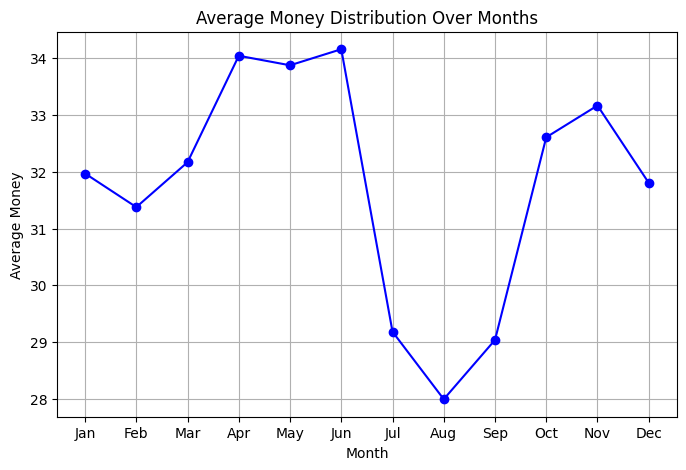

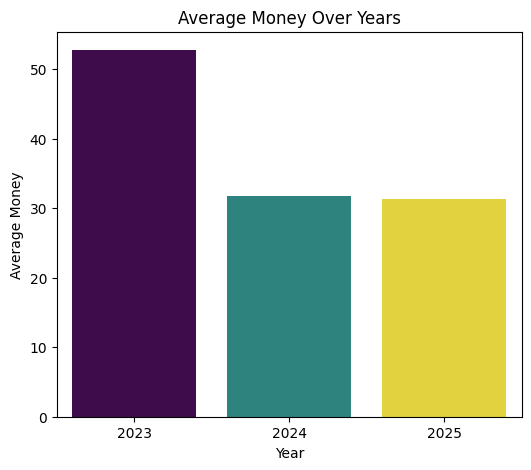

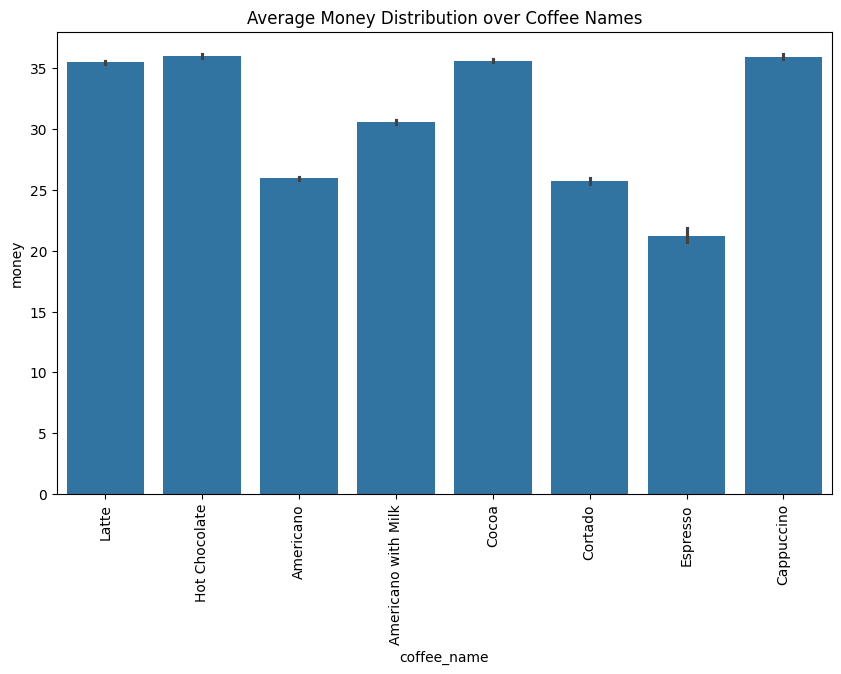


1. Number of columns: 13

2. Duplicate columns: 0

3. Missing values:
 hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
Month          4
Year           2
dtype: int64

4. Average money per year: Year
2023    52.750000
2024    31.737634
2025    31.390011
Name: money, dtype: float64

5. Datatype of grouped_data: <class 'pandas.core.groupby.generic.SeriesGroupBy'>

6. Max money per month: Month_name
Apr    38.70
Aug    32.82
Dec    35.76
Feb    60.00
Jan    45.50
Jul    37.72
Jun    37.72
Mar    38.70
May    37.72
Nov    35.76
Oct    35.76
Sep    35.76
Name: money, dtype: float64

10. Times of Day: ['Morning' 'Afternoon' 'Night' 'Evening']

11. Number of coffee types: 8

12. Max money from each coffee_name:
 coffee_name
Americano              28.9
Americano with Milk    33.8
Cappuccino             60.0
Cocoa                  38.7
Cortado               

In [1911]:
# 1. Inserting synthetic data
synthetic_data = {
    "hour_of_day": [9, 15],
    "cash_type": ["cash", "card"],
    "money": [45.5, 60.0],
    "coffee_name": ["Espresso", "Cappuccino"],
    "Time_of_Day": ["Morning", "Evening"],
    "Weekday": ["Mon", "Tue"],
    "Month_name": ["Jan", "Feb"],
    "Weekdaysort": [1, 2],
    "Monthsort": [1, 2],
    "Date": ["2023-01-15", "2023-02-20"],
    "Time": ["09:10:00", "15:45:00"]
}
synthetic_df = pd.DataFrame(synthetic_data)
coffee_data = pd.concat([coffee_data, synthetic_df], ignore_index=True)

# 2. Number of columns, duplicate columns, missing values
num_columns = coffee_data.shape[1]
duplicates = coffee_data.T.duplicated().sum()
missing_values = coffee_data.isnull().sum()

# 3. Basic statistics
basic_stats = coffee_data.describe(include="all")

# 4. Average money for each year
coffee_data["Date"] = pd.to_datetime(coffee_data["Date"])
coffee_data["Year"] = coffee_data["Date"].dt.year
avg_money_year = coffee_data.groupby("Year")["money"].mean()

# 5. Datatype of grouped_data
grouped_data = coffee_data.groupby("Year")["money"]
datatype_grouped = type(grouped_data)

# 6. Maximum money for each month
max_money_month = coffee_data.groupby("Month_name")["money"].max()

# 7. Distribution of money over months (Line Graph)
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

monthly_avg = coffee_data.groupby("Month_name")["money"].mean().reindex(month_order)

plt.figure(figsize=(8,5))
plt.plot(monthly_avg.index, monthly_avg.values, marker="o", linestyle="-", color="blue")
plt.title("Average Money Distribution Over Months")
plt.xlabel("Month")
plt.ylabel("Average Money")
plt.grid(True)
plt.show()

# 8. Density of money (overall)
yearly_avg = coffee_data.groupby("Year")["money"].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=yearly_avg.index, y=yearly_avg.values, hue=yearly_avg.index, palette="viridis", legend=False)
plt.title("Average Money Over Years")
plt.xlabel("Year")
plt.ylabel("Average Money")
plt.show()

# 9. Distribution of money over coffee names
plt.figure(figsize=(10,6))
sns.barplot(x="coffee_name", y="money", data=coffee_data, estimator=np.mean)
plt.xticks(rotation=90)
plt.title("Average Money Distribution over Coffee Names")
plt.show()

# 10. Times of the Day
times_of_day = coffee_data["Time_of_Day"].unique()

# 11. Number of coffee types
num_coffees = coffee_data["coffee_name"].nunique()

# 12. Max money from coffee_name
max_money_per_coffee = coffee_data.groupby("coffee_name")["money"].max()

# 13. Average money per Time of Day
avg_money_timeofday = coffee_data.groupby("Time_of_Day")["money"].mean()

# Printing results
print("\n1. Number of columns:", num_columns)
print("\n2. Duplicate columns:", duplicates)
print("\n3. Missing values:\n", missing_values)
print("\n4. Average money per year:", avg_money_year)
print("\n5. Datatype of grouped_data:", datatype_grouped)
print("\n6. Max money per month:", max_money_month)
print("\n10. Times of Day:", times_of_day)
print("\n11. Number of coffee types:", num_coffees)
print("\n12. Max money from each coffee_name:\n", max_money_per_coffee)
print("\n13. Avg money per Time of Day:", avg_money_timeofday)